#### Your name should be in the file name such as: 23S_Exam1_part2_Mark_Tenenbaum.ipynb

    Open book, but copy each other is not allowed.
    Total 50 points
    Submit your solutions in ipynb format online.
    Due by today's midnight


------------------------------------
## CSC 430/530_DA401/501 TEST 1 Part II:   
    - (10 points) A. Merge different types of data
    - (15 points) B. Determine a Triangle
    - (15 points) C. Sort US Population Dictionary 
    - (10 points) D. Slicing list (for CSC 530 students only)

  

###### A: Merge different data types[10 points]

    You are given a list of data with different data types:
     x = ["zero", 1, 2, (3, 4), {5, 6, 5}, {"A":"4", "B":"3", "C":"2", "D":"1", "F":"0"}, None]
    
    Write a program to convert the list above to new 1-D list y which holds all digit integers.
     y: [1, 2, 3, 4, 5, 6, 4, 3, 2, 1, 0]

In [101]:
# A: data merging
x = ["zero", 1, 2, (3, 4),{5, 6, 5}, {"A":"4", "B":"3", "C":"2", "D":"1", "F":"0"}, None]
y = [ ]


# your code starts here:
for i in x: 
    
    ## The first relevant type we see is integer (skipping character "zero")
    if type(i) == int:
        y.append(i)
    
    ## the next type we see is tuple. Let's grab the integers.
    elif type(i) == tuple:
        for ii in i:
            if type(ii) == int:
                y.append(ii)
    
    ## the next type we see is a set
    elif type(i) == set:
        for ii in i:
            if type(ii) == int:
                y.append(ii)
                
    ## the next type we see is a dictionary
    elif type(i) == dict:
        for ii in i.values():
            
            ## setting strings to integers
            if isinstance(ii, str) and ii.isdigit():
                y.append(int(ii))
                
## print            
print(y)
            

[1, 2, 3, 4, 5, 6, 4, 3, 2, 1, 0]


### B. Triangle Function [15 points]
    
      B1. [10 points] Define a function which accepts three positive integers(any order), then determine a triangle type.
      
           - parameters: 
               a, b, c are 3 positive integers. 
               
          -  determine if they form a valid triangle or not: 
      
          -  if yes, your program also needs to check if it is: 
                  (a) an acute,   
                  (b) a right, or    
                  (c) an obtuse. 
               then return a message valid plus (acute, right, obtuse) type triangle
               
          - if no,  return a message "they cannot form a valid triangle." 
          

In [147]:
# B1 triangle function [10]
# =========================


# Your code starts here:
def is_triangle(a, b, c):
    a, b, c = sorted([a, b, c])
    while True:
        
        ## conditions for valid triangle, found in lab 1
        if (a+b > c) and (c + a > b) and (b + c > a) and (a > 0) and (b>0) and (c>0):
            
            ## right triangle
            if a**2 + b**2 == c**2:
                print('Your triangle is valid')
                print('It is a right triangle')
                break
                
            ## acute triangle
            elif (a**2 + b**2 > c**2):
                print('Your triangle is valid')
                print('It is an acute triangle')
                break
                
            ## obtuse triangle
            elif (a**2 + b**2 < c**2):
                print('Your triangle is valid')
                print('It is an obtuse triangle')
                break
                
        ## if triangle is not valid
        else:
            print('NOT a valid triangle')
            break

      B2. [5 points] Write a driver program to test the function above. Your program will:
         1) ask a user to input three integers from the keyboard  
         2) call the function above then print the return message  
         3) use a loop to ask the user if (a) quit or (b) try again.
         
         Please test it for 4 cases 
          a. not valid, b. valid acute, c. valid right, and d. valid obtuse.
 


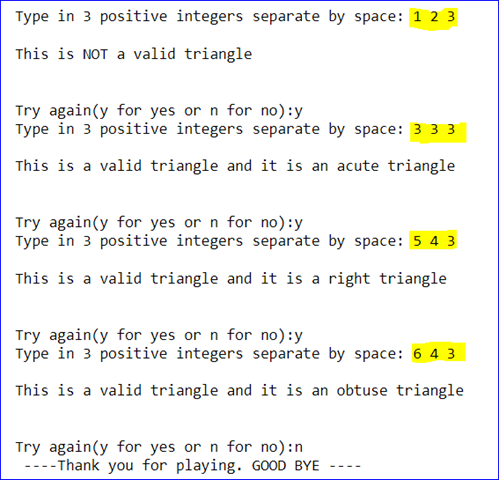

In [148]:
while True:
    
    ## enter digits and place them into is_triangle function
    user_digits = input('Please type three positive integers separated by space: ')
    a, b, c = map(int, user_digits.split())
    is_triangle(a, b, c)
    
    ## play again?
    play_again = input('Do you want to play again? y/n')
    if play_again == 'n' or play_again == 'N':
        print('Thank you for playing. Goodbye.')
        break

Please type three positive integers separated by space:  3 3 3 


Your triangle is valid
It is an acute triangle


Do you want to play again? y/n y
Please type three positive integers separated by space:  1 2 3


NOT a valid triangle


Do you want to play again? y/n y
Please type three positive integers separated by space:  5 4 3


Your triangle is valid
It is a right triangle


Do you want to play again? y/n n


Thank you for playing. Goodbye.


In [13]:
# For your reference: you can use the following code to get 3 integers using one input().

a, b, c = map(int, input("Type in 3 positive integers separated by a space: ").split())
a, b, c 

Type in 3 positive integers separated by a space: 8 9 10


(8, 9, 10)

### C. Sort US Population [15 points]

You are given a csv file which contains the us census data in 2019. 
After reading in from the disk, data are saved in a list. Here is the first 5 states in the list:  

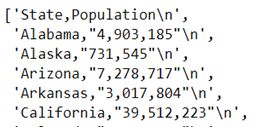 
 


#### C1. Read in data from local disk
  
 - please do not change the questions.
 - do not use Excel nor Numpy nor Pandas to process data.
 


In [135]:
#C1. read in data [given], do not change this cell
#-------------------------
with open("US_population_2019.csv") as pop:
    pop_data = pop.readlines()

pop_data[:5] 

['State,Population\n',
 'Alabama,"4,903,185"\n',
 'Alaska,"731,545"\n',
 'Arizona,"7,278,717"\n',
 'Arkansas,"3,017,804"\n']

#### C2: Ceate a dictionary to hold the data [10]
 ---- 
 hint:  the string replace() method can be used to remove the commas:  
  "123,456,789".replace(',' , '')  # change to "123456789"


In [149]:
## create empty dictionary
my_dict = {}

## removing headers
pop_data_new = pop_data[1:]

## removing all but the first commas 
for i in range(len(pop_data_new)):
    state, pop = pop_data_new[i].strip().split(',', 1)
    pop_data_new[i] = f'{state},{pop.replace(",", "")}'

## create dictionary
for i in pop_data_new:
    items = i.split(",")
    state = items[0]
    pop = items[1].replace('"', '')
    my_dict[state] = int(pop)

## disiplay dictionary
print(my_dict)

{'Alabama': 4903185, 'Alaska': 731545, 'Arizona': 7278717, 'Arkansas': 3017804, 'California': 39512223, 'Colorado': 5758736, 'Connecticut': 3565287, 'Delaware': 973764, 'Florida': 21477737, 'Georgia': 10617423, 'Hawaii': 1415872, 'Idaho': 1787065, 'Illinois': 12671821, 'Indiana': 6732219, 'Iowa': 3155070, 'Kansas': 2913314, 'Kentucky': 4467673, 'Louisiana': 4648794, 'Maine': 1344212, 'Maryland': 6045680, 'Massachusetts': 6892503, 'Michigan': 9986857, 'Minnesota': 5639632, 'Mississippi': 2976149, 'Missouri': 6137428, 'Montana': 1068778, 'Nebraska': 1934408, 'Nevada': 3080156, 'New Hampshire': 1359711, 'New Jersey': 8882190, 'New Mexico': 2096829, 'New York': 19453561, 'North Carolina': 10488084, 'North Dakota': 762062, 'Ohio': 11689100, 'Oklahoma': 3956971, 'Oregon': 4217737, 'Pennsylvania': 12801989, 'Rhode Island': 1059361, 'South Carolina': 5148714, 'South Dakota': 884659, 'Tennessee': 6829174, 'Texas': 28995881, 'Utah': 3205958, 'Vermont': 623989, 'Virginia': 8535519, 'Washington': 

### C3.  Sort the dictionary by population with descending order then print out [5]

    - use sorted function
    - print out the sorted results
    - please do not use collections module for sorting

    California     :        39512223
    Texas          :        28995881
    Florida        :        21477737
 
     .....
    Vermont        :          623989
    Wyoming        :          578759

In [150]:
# C3. sort the dictionary by value and display the state:value pairs in descending order
# ======================================================================================

# your code starts here
my_dict_2 = dict(sorted(my_dict.items(), key=lambda item: item[1], reverse = True))

my_dict_2

{'California': 39512223,
 'Texas': 28995881,
 'Florida': 21477737,
 'New York': 19453561,
 'Pennsylvania': 12801989,
 'Illinois': 12671821,
 'Ohio': 11689100,
 'Georgia': 10617423,
 'North Carolina': 10488084,
 'Michigan': 9986857,
 'New Jersey': 8882190,
 'Virginia': 8535519,
 'Washington': 7614893,
 'Arizona': 7278717,
 'Massachusetts': 6892503,
 'Tennessee': 6829174,
 'Indiana': 6732219,
 'Missouri': 6137428,
 'Maryland': 6045680,
 'Wisconsin': 5822434,
 'Colorado': 5758736,
 'Minnesota': 5639632,
 'South Carolina': 5148714,
 'Alabama': 4903185,
 'Louisiana': 4648794,
 'Kentucky': 4467673,
 'Oregon': 4217737,
 'Oklahoma': 3956971,
 'Connecticut': 3565287,
 'Utah': 3205958,
 'Iowa': 3155070,
 'Nevada': 3080156,
 'Arkansas': 3017804,
 'Mississippi': 2976149,
 'Kansas': 2913314,
 'New Mexico': 2096829,
 'Nebraska': 1934408,
 'West Virginia': 1792147,
 'Idaho': 1787065,
 'Hawaii': 1415872,
 'New Hampshire': 1359711,
 'Maine': 1344212,
 'Montana': 1068778,
 'Rhode Island': 1059361,
 'Del

Search in a sorted list_num [x,   ...  ,  y] for all its member elements whose values fall into a given value interval [a, b] inclusive. 

Find out the indices index_a and index_b for the slicing of list_num if they exist. Assuming a>=x and b>=y.

You are required to:
    (1) Write a function which accepts two lists corresponding the sorted list and the interval list, then find the two indices low and high(if there are), then returns them; otherwise returns None, None.

    (2) Then write a testing program to test all cases given blow.Search in a sorted list_num [x,   ...  ,  y] for all its member elements whose values fall into a given value interval [a, b] inclusive. 

Find out the indices index_a and index_b for the slicing of list_num if they exist. Assuming a>=x and b>=y.

You are required to:
    (1) Write a function which accepts two lists corresponding the sorted list and the interval list, then find the two indices low and high(if there are), then returns them; otherwise returns None, None.

    (2) Then write a testing program to test all cases given blow.###  D. List Slicing ( for CSC 530 students only, other students will get 10 points automatically)



    Search in a sorted list_num [x,   ...  ,  y] for all its member elements whose values fall into a given value interval [a, b] inclusive. 
    
    Find out the indices index_a and index_b for the slicing of list_num if they exist. Assuming a>=x and b>=y.
    
    You are required to:
        (1) Write a function which accepts two lists corresponding the sorted list and the interval list, then find the two indices low and high(if there are), then returns them; otherwise returns None, None.

        (2) Then write a testing program to test all cases given blow.




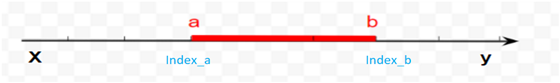


In [151]:
# Write the function 

# your code here:

def my_range(list_num, interval):
    
    ## setting indicators for indexes blank
    start = None
    finish = None
    
    ## starting loop
    for i in range(len(list_num)):
        
        ## if element >= start of the interval
        if list_num[i] >= interval[0] and start == None:
            start = i
            
        ## checks if element greater than end of interval
        if list_num[i] > interval[1]:
            finish = i
            break
            
    if start != None and finish == None:
        finish = len(list_num)
    if start == None or finish == None or finish <= start:
        print("not found")
    else:
        print('index_a = ', start, 'index_b=', finish - 1)


---
Test your function using the following example: 
  
    suppose the following sorted list_num is given:  list_num = [2, 5, 5, 5, 7, 9, 9, 10, 15, 15, 17, 19]  
    
    (1). Given a value interval [a, b] = [6, 12], the answer should be indices index_a = 4 and index_b = 8, because every element in list_num[4:8] has a value belonging to the value interval [6, 12] and all the other array elements do not.
     
    
    (2). Given a value interval [a, b]= [11,14], the answer should be "not found", because no list element has a value belonging to this interval. 

    (3). Other possibilities you have
   

In [152]:
# Your test code:

# test 1
list_num = [2, 5, 5, 5, 7, 9, 9, 10, 15, 15, 17, 19] 
interval = [11, 14]
my_range(list_num, interval)

## test 2
interval = [6, 12]
my_range(list_num, interval)


# test 3
interval = [1,5]
my_range(list_num, interval)

not found
index_a =  4 index_b= 7
index_a =  0 index_b= 3


In [12]:
# End